In [14]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from typing import List, Optional, Sequence, Any

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# Initial Sweep: All Tasks, Different Set Sizes

In [15]:
###########
# Utility #
###########

def filter_by_values(data: pd.DataFrame, column: str, values: Sequence[Any]) -> pd.DataFrame:
    return data[data[column].isin(values)]

def average_over_seeds(data: pd.DataFrame) -> pd.DataFrame:
    averaged_data = data.groupby(["model", "task"], as_index=False).mean()
    averaged_data.drop("seed", axis="columns", inplace=True)
    return averaged_data

def get_result_paths(directory: str):
    return [os.path.join(directory, f) for f in os.listdir(directory)]

# result_paths = get_result_paths(os.path.join("data", "set-size-sweeps-overall"))
result_paths = get_result_paths(os.path.join("data", "all-tasks"))
result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
results = pd.concat([
    df[[
        "type",
        "label",
        "max_set_size",
        "test_label_std",
        "test_mae",
        "test_r2",
        "random_seed"
    ]]
for df in result_dfs])

#################
# Preprocessing #
#################

# Restrict to maximum set size of 16.
results = filter_by_values(
    results,
    "max_set_size",
    values=[16]
)

# Rename the columns to more user-friendly values.
results = results.rename(
    columns={
        "type": "model",
        "label": "task",
        "test_label_std": "label_std",
        "test_mae": "mae",
        "test_r2": "r2",
        "random_seed": "seed",
    }
)

# Filter out all the tasks we want to display.
results = filter_by_values(
    results,
    "task", 
    values=[
        "sum",
        "largest_pair_sum",
        "largest_triple_sum",
        "longest_seq_length",
        "largest_contiguous_sum",
        "max",
        "cardinality"
    ]
)

# Filter out all the models we want to display.
results = filter_by_values(
    results,
    "model",
    values=[
        "mean_baseline",
        "deepsets_mlp_sum",
        "deepsets_mlp_fspool",
        "sorted_mlp",
        "mlp",
        "pna",
        "small_set_transformer"
    ]
)

# Accumulate results over the different seeds.
results_mean = results.groupby(["model", "task"], as_index=False).mean()
results_std = results.groupby(["model", "task"], as_index=False).std()

results = results_mean
results_mean["mae_std"] = results_std["mae"]
results_mean["r2_std"] = results_std["r2"]
results.drop("seed", axis="columns", inplace=True)

# Filter out the columns we need.
results = results[["model", "task", "label_std", "mae", "mae_std", "r2", "r2_std"]]

# Rename models to display names.
# DISPLAY_MODEL_NAMES = {
#     "deepsets_mlp_sum": "DeepSets",
#     "deepsets_mlp_fspool": "DeepSets + FSPool",
#     "sorted_mlp": "Sorting + MLP",
#     "mlp": "MLP",
#     "pna": "PNA",
#     "small_set_transformer": "Set Transformer"    
# }

# for old, new in DISPLAY_MODEL_NAMES.items():
#     results = results.replace(
#         to_replace=old,
#         value=new
#     )

# Rename tasks to display names.
DISPLAY_TASK_NAMES = {
    "sum": "Sum",
    "largest_pair_sum": "Max. Pair Sum",
    "largest_triple_sum": "Max. Trip. Sum",
    "longest_seq_length": "Max. Seq. Len.",
    "largest_contiguous_sum": "Max. Contiguous Sum",
    "max": "Max.",
    "cardinality": "Cardinality"
}

for old, new in DISPLAY_TASK_NAMES.items():
    results = results.replace(
        to_replace=old,
        value=new
    )

display(results)

,model,task,label_std,mae,mae_std,r2,r2_std
0,deepsets_mlp_fspool,Cardinality,4.617410,0.009462,0.003389,0.999982,2.054292e-05
1,deepsets_mlp_fspool,Max. Contiguous Sum,154.049463,0.489684,0.199212,0.999893,1.128007e-04
2,deepsets_mlp_fspool,Max. Pair Sum,73.258830,1.613536,0.213992,0.998869,3.189683e-04
3,deepsets_mlp_fspool,Max. Trip. Sum,107.498862,1.945709,0.224233,0.999208,1.429174e-04
4,deepsets_mlp_fspool,Max. Seq. Len.,0.599587,0.329053,0.014475,0.396280,1.947339e-02
5,deepsets_mlp_fspool,Max.,37.018440,0.748938,0.307339,0.998427,1.949310e-03
6,deepsets_mlp_fspool,Sum,170.142111,0.293155,0.186620,0.999991,1.160727e-05
7,deepsets_mlp_sum,Cardinality,4.617410,0.003972,0.001975,0.999998,1.393406e-06
8,deepsets_mlp_sum,Max. Contiguous Sum,154.049463,0.376230,0.282581,0.999966,2.456842e-05
9,deepsets_mlp_sum,Max. Pair Sum,73.258830,1.982976,0.146345,0.998688,2.276941e-04


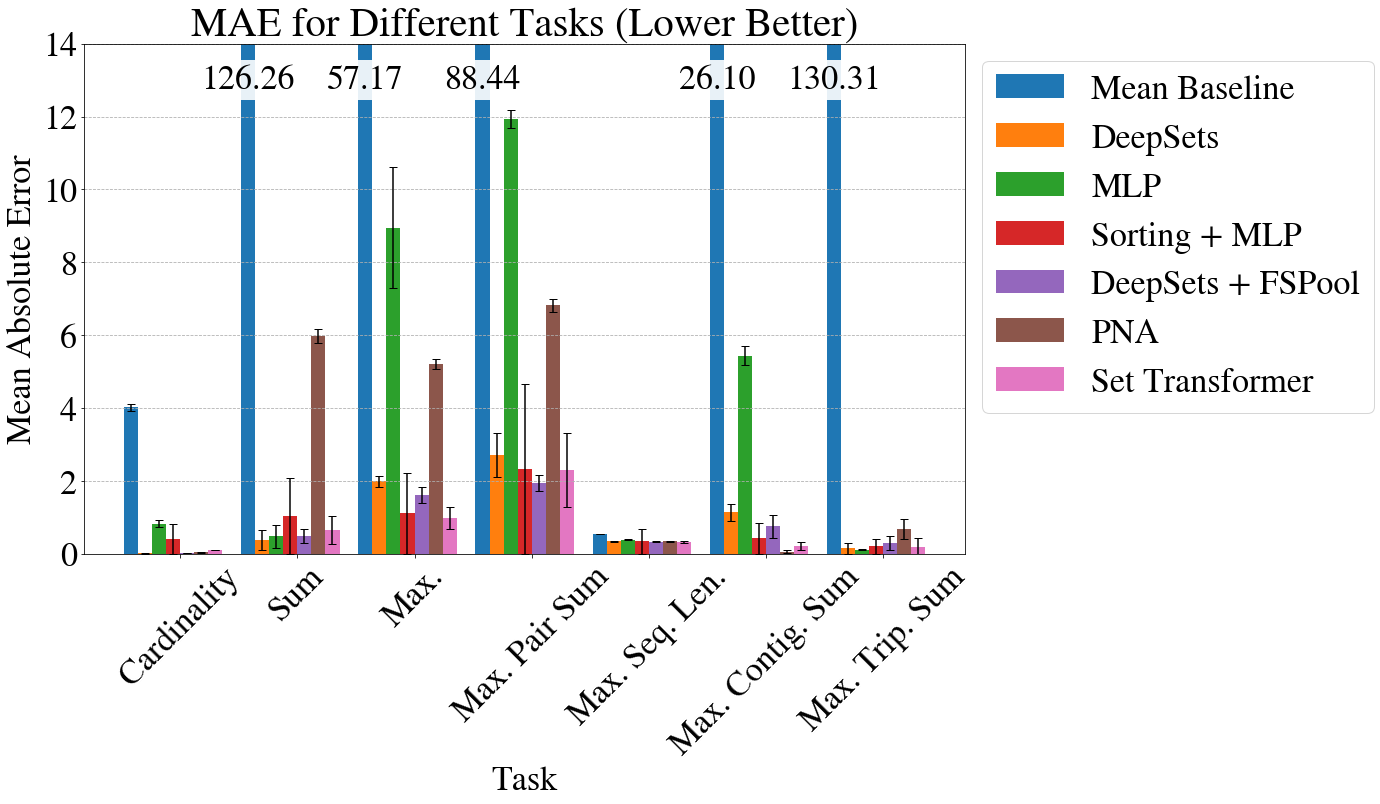

In [18]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34

labels = [
    "Cardinality",
    "Sum",
    "Max.",
    "Max. Pair Sum",
    "Max. Seq. Len.",
    "Max. Contig. Sum",
    "Max. Trip. Sum",
]
# print(labels)
# labels = results["task"].unique()

baseline_means = results[results["model"] == "mean_baseline"]["mae"]
baselien_errs = results[results["model"] == "mean_baseline"]["mae_std"]

mlp_means = results[results["model"] == "mlp"]["mae"]
mlp_errs = results[results["model"] == "mlp"]["mae_std"]

sorted_mlp_means = results[results["model"] == "sorted_mlp"]["mae"]
sorted_mlp_errs = results[results["model"] == "sorted_mlp"]["mae_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["mae"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["mae_std"]

deepsets_fspool_means = results[results["model"] == "deepsets_mlp_fspool"]["mae"]
deepsets_fspool_errs = results[results["model"] == "deepsets_mlp_fspool"]["mae_std"]

pna_means = results[results["model"] == "pna"]["mae"]
pna_errs = results[results["model"] == "pna"]["mae_std"]

set_transformer_means = results[results["model"] == "small_set_transformer"]["mae"]
set_transformer_errs = results[results["model"] == "small_set_transformer"]["mae_std"]


x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(20,12))
fig.set_facecolor("white")

bars_1 = ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baselien_errs, capsize=4, width=width, label="Mean Baseline")
ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=sorted_mlp_means, yerr=sorted_mlp_means, capsize=4, width=width, label="Sorting + MLP")
ax.bar(x=(x + 1 * width/2), height=deepsets_fspool_means, yerr=deepsets_fspool_errs, capsize=4, width=width, label="DeepSets + FSPool")
ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

# Add text labels for the bars ourside of the plot.
exclude_baselines = [0, 4]
baseline_offset = 14
for i, x_val in enumerate(x):
    if i in exclude_baselines:
        continue
    ax.text(
        x=x_val - 7 * width/2,
        y=13,
        s=f"{baseline_means[i + baseline_offset]:.2f}",
        ha="center",
        va="center",
        bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.9}
    )

ax.set_xlabel("Task")
ax.set_xticks(x, labels)
ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("Mean Absolute Error")
ax.set_ylim([0, 14])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("MAE for Different Tasks (Lower Better)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("mae-different-tasks-all-models.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()

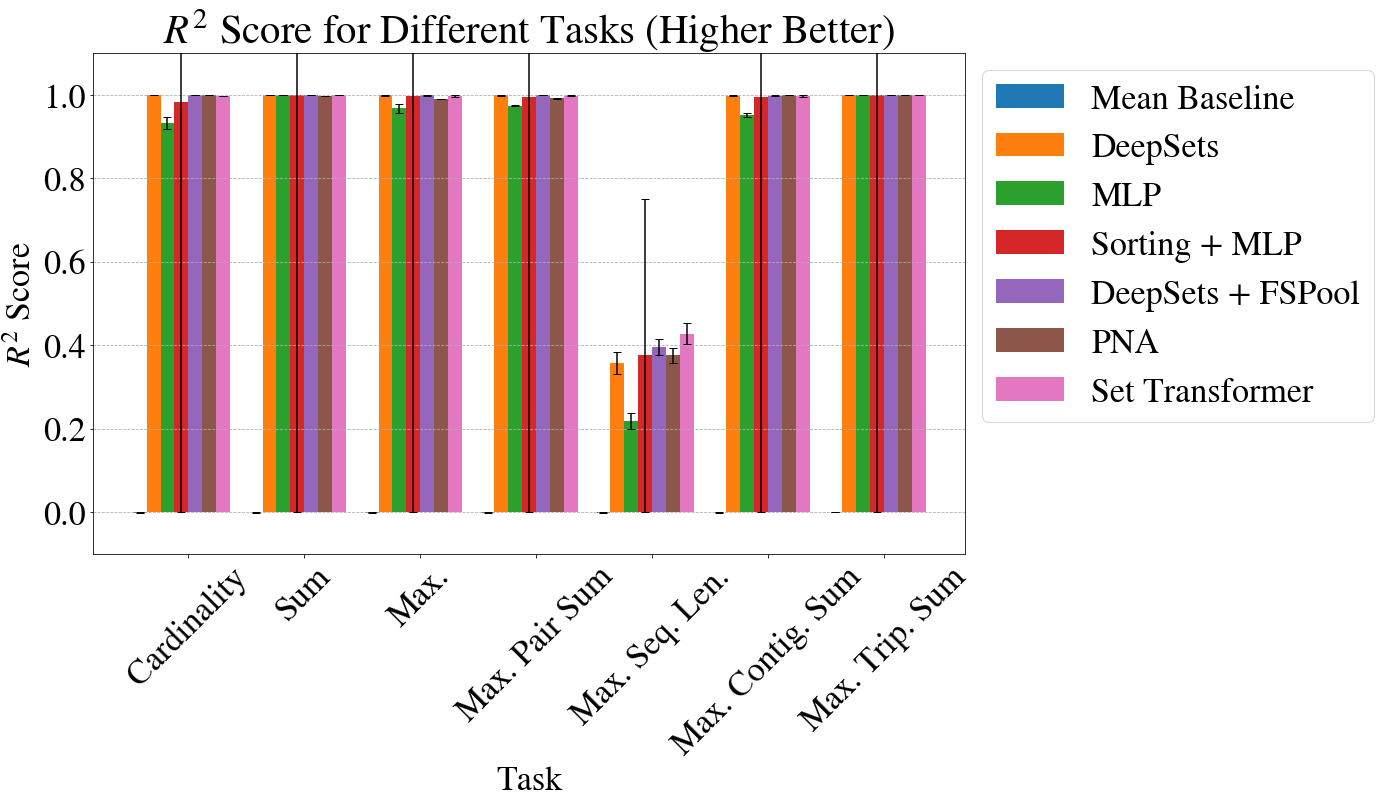

In [19]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34

labels = [
    "Cardinality",
    "Sum",
    "Max.",
    "Max. Pair Sum",
    "Max. Seq. Len.",
    "Max. Contig. Sum",
    "Max. Trip. Sum",
]
# print(labels)
# labels = results["task"].unique()

baseline_means = results[results["model"] == "mean_baseline"]["r2"]
baselien_errs = results[results["model"] == "mean_baseline"]["r2_std"]

mlp_means = results[results["model"] == "mlp"]["r2"]
mlp_errs = results[results["model"] == "mlp"]["r2_std"]

sorted_mlp_means = results[results["model"] == "sorted_mlp"]["r2"]
sorted_mlp_errs = results[results["model"] == "sorted_mlp"]["r2_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["r2"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["r2_std"]

deepsets_fspool_means = results[results["model"] == "deepsets_mlp_fspool"]["r2"]
deepsets_fspool_errs = results[results["model"] == "deepsets_mlp_fspool"]["r2_std"]

pna_means = results[results["model"] == "pna"]["r2"]
pna_errs = results[results["model"] == "pna"]["r2_std"]

set_transformer_means = results[results["model"] == "small_set_transformer"]["r2"]
set_transformer_errs = results[results["model"] == "small_set_transformer"]["r2_std"]


x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(20,12))
fig.set_facecolor("white")

ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baselien_errs, capsize=4, width=width, label="Mean Baseline")
ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=sorted_mlp_means, yerr=sorted_mlp_means, capsize=4, width=width, label="Sorting + MLP")
ax.bar(x=(x + 1 * width/2), height=deepsets_fspool_means, yerr=deepsets_fspool_errs, capsize=4, width=width, label="DeepSets + FSPool")
ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

ax.set_xlabel("Task")
ax.set_xticks(x, labels)
ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("$R^2$ Score")
ax.set_ylim([-0.1, 1.1])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("$R^2$ Score for Different Tasks (Higher Better)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("r2-different-tasks-all-models.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()

# Follow-Up: Desperate Student Task & All Models

In [21]:
###########
# Utility #
###########

def filter_by_values(data: pd.DataFrame, column: str, values: Sequence[Any]) -> pd.DataFrame:
    return data[data[column].isin(values)]

def average_over_seeds(data: pd.DataFrame) -> pd.DataFrame:
    averaged_data = data.groupby(["model", "task"], as_index=False).mean()
    averaged_data.drop("seed", axis="columns", inplace=True)
    return averaged_data

def get_result_paths(directory: str):
    return [os.path.join(directory, f) for f in os.listdir(directory)]

# result_paths = get_result_paths(os.path.join("data", "desperate-student"))
result_paths = get_result_paths(os.path.join("data", "desperate-student-new"))
result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
results = pd.concat([
    df[[
        "type",
        "label",
        "max_set_size",
        "test_label_std",
        "test_mae",
        "test_r2",
        "test_mase",
        "random_seed"
    ]]
for df in result_dfs])

#################
# Preprocessing #
#################

# Restrict to maximum set size of 16.
results = filter_by_values(
    results,
    "max_set_size",
    values=[16]
)

# Rename the columns to more user-friendly values.
results = results.rename(
    columns={
        "type": "model",
        "label": "task",
        "test_label_std": "label_std",
        "test_mae": "mae",
        "test_r2": "r2",
        "test_mase": "mase",
        "random_seed": "seed",
    }
)

# Filter out all the tasks we want to display.
results = filter_by_values(
    results,
    "task", 
    values=[
        "desperate_student_1_tuple",
        "desperate_student_2_tuple",
        "desperate_student_3_tuple",
        "desperate_student_4_tuple",
        "desperate_student_5_tuple",
    ]
)

# Filter out all the models we want to display.
results = filter_by_values(
    results,
    "model",
    values=[
        "mean_baseline",
        "deepsets_mlp_sum",
        "deepsets_mlp_fspool",
        "sorted_mlp",
        "mlp",
        "pna",
        "small_set_transformer"
    ]
)

# Accumulate results over the different seeds.
results_mean = results.groupby(["model", "task"], as_index=False).mean()
results_std = results.groupby(["model", "task"], as_index=False).std()

results = results_mean
results_mean["mae_std"] = results_std["mae"]
results_mean["r2_std"] = results_std["r2"]
results_mean["mase_std"] = results_std["mase"]
results.drop("seed", axis="columns", inplace=True)

# Filter out the columns we need.
results = results[["model", "task", "label_std", "mae", "mae_std", "r2", "r2_std", "mase", "mase_std"]]

# Rename models to display names.
# DISPLAY_MODEL_NAMES = {
#     "deepsets_mlp_sum": "DeepSets",
#     "deepsets_mlp_fspool": "DeepSets + FSPool",
#     "sorted_mlp": "Sorting + MLP",
#     "mlp": "MLP",
#     "pna": "PNA",
#     "small_set_transformer": "Set Transformer"    
# }

# for old, new in DISPLAY_MODEL_NAMES.items():
#     results = results.replace(
#         to_replace=old,
#         value=new
#     )

# Rename tasks to display names.
DISPLAY_TASK_NAMES = {
    "desperate_student_1_tuple": "1",
    "desperate_student_2_tuple": "2",
    "desperate_student_3_tuple": "3",
    "desperate_student_4_tuple": "4",
    "desperate_student_5_tuple": "5",
    # "desperate_student_6_tuple": "6",
}

for old, new in DISPLAY_TASK_NAMES.items():
    results = results.replace(
        to_replace=old,
        value=new
    )

display(results)

,model,task,label_std,mae,mae_std,r2,r2_std,mase,mase_std
0,deepsets_mlp_fspool,1,14.103166,0.415593,0.086668,0.997845,0.000723,0.040482,0.008613
1,deepsets_mlp_fspool,2,10.778322,0.160217,0.016691,0.999465,0.000140,0.020366,0.002233
2,deepsets_mlp_fspool,3,7.915071,0.128200,0.027081,0.999288,0.000265,0.022269,0.004605
3,deepsets_mlp_fspool,4,6.210568,0.098802,0.021344,0.999193,0.000308,0.022789,0.004901
4,deepsets_mlp_fspool,5,4.853772,0.084527,0.010239,0.998974,0.000275,0.025042,0.002926
5,deepsets_mlp_sum,1,14.103166,0.259017,0.098359,0.999341,0.000410,0.025236,0.009663
6,deepsets_mlp_sum,2,10.778322,0.308681,0.035177,0.997339,0.000884,0.039246,0.004739
7,deepsets_mlp_sum,3,7.915071,0.280406,0.036108,0.994994,0.002216,0.048774,0.006550
8,deepsets_mlp_sum,4,6.210568,0.197365,0.036194,0.993526,0.004823,0.045529,0.008360
9,deepsets_mlp_sum,5,4.853772,0.161553,0.033552,0.989114,0.012057,0.047851,0.009751


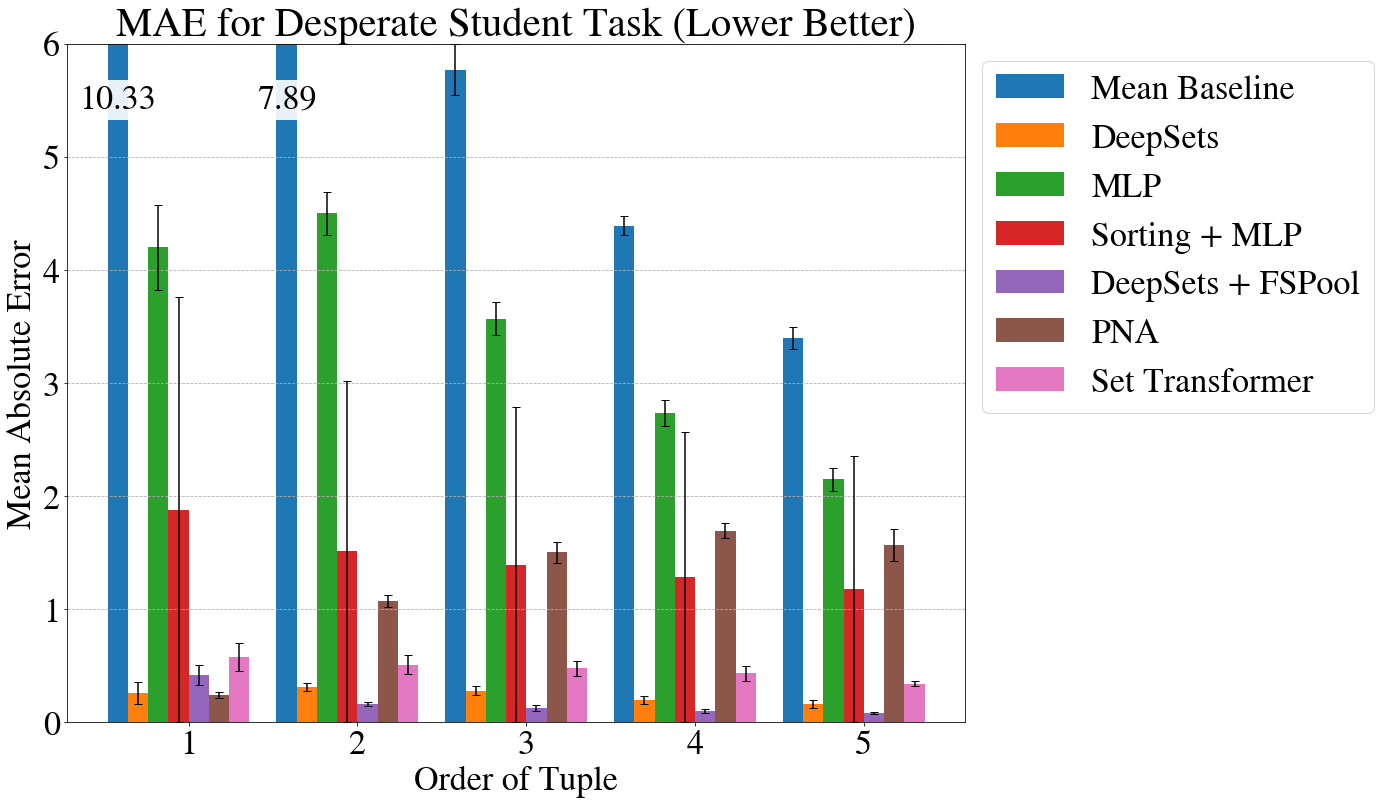

In [24]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34

labels = [
    "1",
    "2",
    "3",
    "4",
    "5",
    # "6",
]
# print(labels)
# labels = results["task"].unique()

baseline_means = results[results["model"] == "mean_baseline"]["mae"]
baselien_errs = results[results["model"] == "mean_baseline"]["mae_std"]

mlp_means = results[results["model"] == "mlp"]["mae"]
mlp_errs = results[results["model"] == "mlp"]["mae_std"]

sorted_mlp_means = results[results["model"] == "sorted_mlp"]["mae"]
sorted_mlp_errs = results[results["model"] == "sorted_mlp"]["mae_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["mae"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["mae_std"]

deepsets_fspool_means = results[results["model"] == "deepsets_mlp_fspool"]["mae"]
deepsets_fspool_errs = results[results["model"] == "deepsets_mlp_fspool"]["mae_std"]

pna_means = results[results["model"] == "pna"]["mae"]
pna_errs = results[results["model"] == "pna"]["mae_std"]

set_transformer_means = results[results["model"] == "small_set_transformer"]["mae"]
set_transformer_errs = results[results["model"] == "small_set_transformer"]["mae_std"]


x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(20,12))
fig.set_facecolor("white")

ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baselien_errs, capsize=4, width=width, label="Mean Baseline")
ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=sorted_mlp_means, yerr=sorted_mlp_means, capsize=4, width=width, label="Sorting + MLP")
ax.bar(x=(x + 1 * width/2), height=deepsets_fspool_means, yerr=deepsets_fspool_errs, capsize=4, width=width, label="DeepSets + FSPool")
ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

# Add text labels for the bars ourside of the plot.
include_baselines = [0, 1]
baseline_offset = 10
for i, x_val in enumerate(x):
    if i not in include_baselines:
        continue
    ax.text(
        x=x_val - 7 * width/2,
        y=5.5,
        s=f"{baseline_means[i + baseline_offset]:.2f}",
        ha="center",
        va="center",
        bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.9}
    )

ax.set_xlabel("Order of Tuple")
ax.set_xticks(x, labels)
# ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("Mean Absolute Error")
ax.set_ylim([0, 6])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("MAE for Desperate Student Task (Lower Better)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("mae-desperate-student.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()

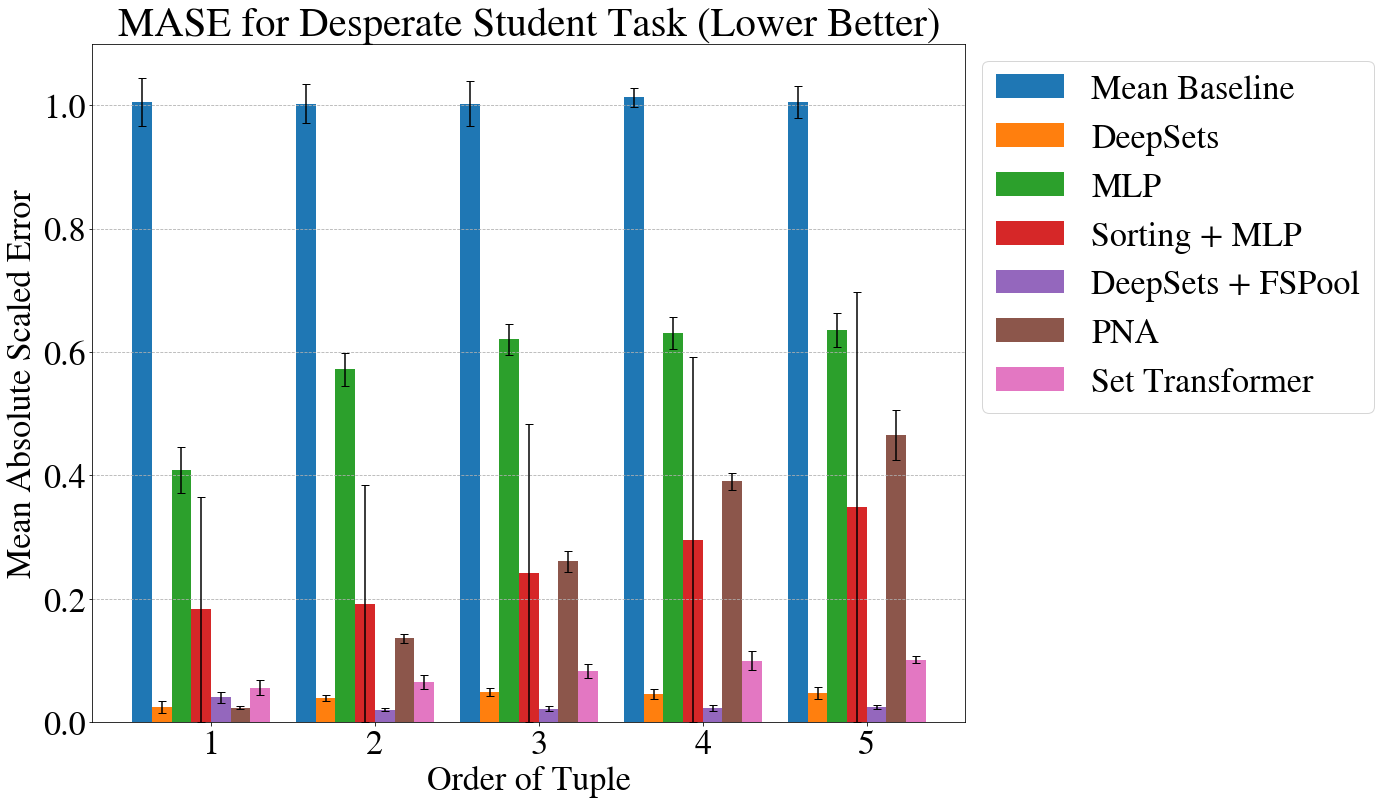

In [25]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34

labels = [
    "1",
    "2",
    "3",
    "4",
    "5",
    # "6",
]
# print(labels)
# labels = results["task"].unique()

baseline_means = results[results["model"] == "mean_baseline"]["mase"]
baseline_errs = results[results["model"] == "mean_baseline"]["mase_std"]

mlp_means = results[results["model"] == "mlp"]["mase"]
mlp_errs = results[results["model"] == "mlp"]["mase_std"]

sorted_mlp_means = results[results["model"] == "sorted_mlp"]["mase"]
sorted_mlp_errs = results[results["model"] == "sorted_mlp"]["mase_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["mase"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["mase_std"]

deepsets_fspool_means = results[results["model"] == "deepsets_mlp_fspool"]["mase"]
deepsets_fspool_errs = results[results["model"] == "deepsets_mlp_fspool"]["mase_std"]

pna_means = results[results["model"] == "pna"]["mase"]
pna_errs = results[results["model"] == "pna"]["mase_std"]

set_transformer_means = results[results["model"] == "small_set_transformer"]["mase"]
set_transformer_errs = results[results["model"] == "small_set_transformer"]["mase_std"]

x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(20,12))
fig.set_facecolor("white")

ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baseline_errs, capsize=4, width=width, label="Mean Baseline")
ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=sorted_mlp_means, yerr=sorted_mlp_means, capsize=4, width=width, label="Sorting + MLP")
ax.bar(x=(x + 1 * width/2), height=deepsets_fspool_means, yerr=deepsets_fspool_errs, capsize=4, width=width, label="DeepSets + FSPool")
ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

ax.set_xlabel("Order of Tuple")
ax.set_xticks(x, labels)
# ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("Mean Absolute Scaled Error")
ax.set_ylim([0, 1.1])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("MASE for Desperate Student Task (Lower Better)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("mase-desperate-student.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()

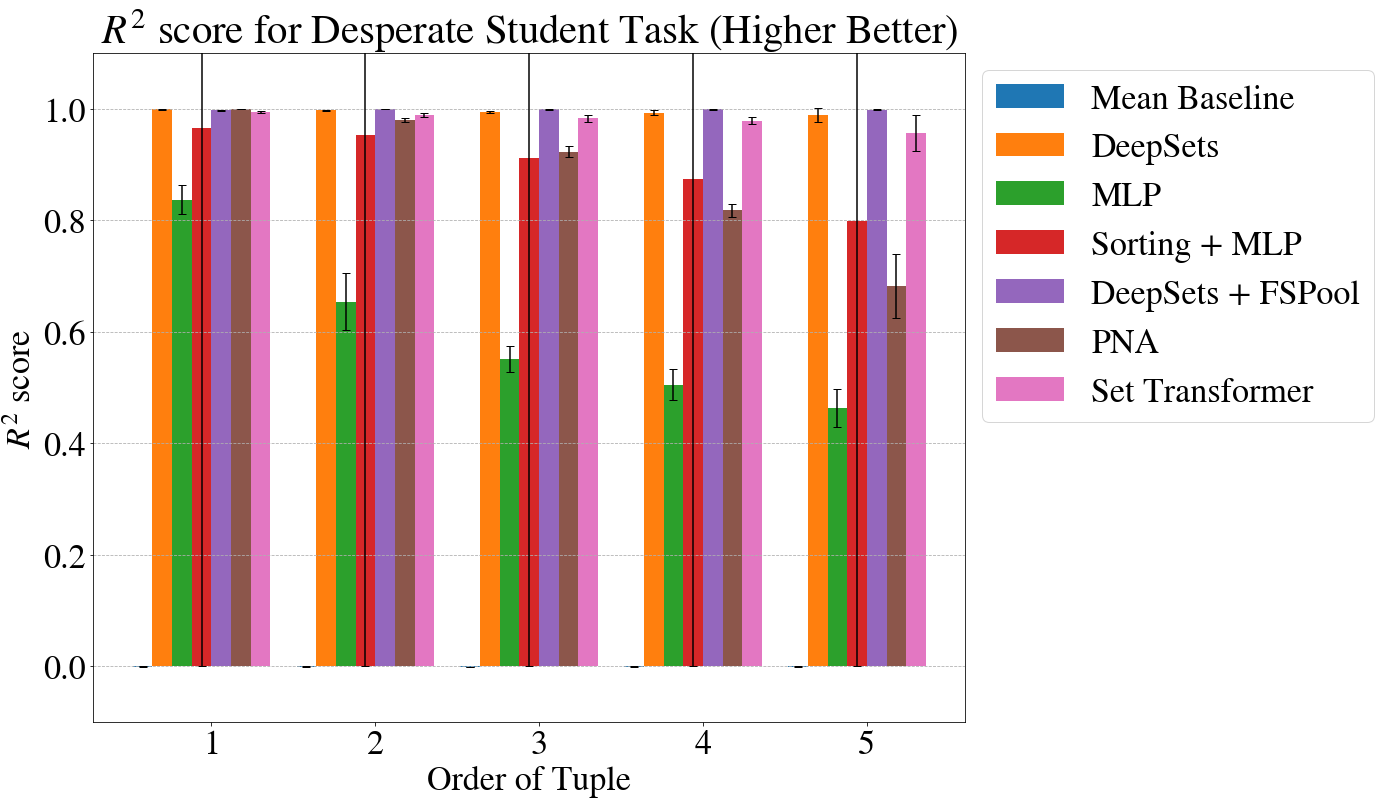

In [28]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34

labels = [
    "1",
    "2",
    "3",
    "4",
    "5",
    # "6",
]
# print(labels)
# labels = results["task"].unique()

baseline_means = results[results["model"] == "mean_baseline"]["r2"]
baselien_errs = results[results["model"] == "mean_baseline"]["r2_std"]

mlp_means = results[results["model"] == "mlp"]["r2"]
mlp_errs = results[results["model"] == "mlp"]["r2_std"]

sorted_mlp_means = results[results["model"] == "sorted_mlp"]["r2"]
sorted_mlp_errs = results[results["model"] == "sorted_mlp"]["r2_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["r2"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["r2_std"]

deepsets_fspool_means = results[results["model"] == "deepsets_mlp_fspool"]["r2"]
deepsets_fspool_errs = results[results["model"] == "deepsets_mlp_fspool"]["r2_std"]

pna_means = results[results["model"] == "pna"]["r2"]
pna_errs = results[results["model"] == "pna"]["r2_std"]

set_transformer_means = results[results["model"] == "small_set_transformer"]["r2"]
set_transformer_errs = results[results["model"] == "small_set_transformer"]["r2_std"]


x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(20,12))
fig.set_facecolor("white")

ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baselien_errs, capsize=4, width=width, label="Mean Baseline")
ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=sorted_mlp_means, yerr=sorted_mlp_means, capsize=4, width=width, label="Sorting + MLP")
ax.bar(x=(x + 1 * width/2), height=deepsets_fspool_means, yerr=deepsets_fspool_errs, capsize=4, width=width, label="DeepSets + FSPool")
ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

ax.set_xlabel("Order of Tuple")
ax.set_xticks(x, labels)
# ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("$R^2$ score")
ax.set_ylim([-0.1, 1.1])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("$R^2$ score for Desperate Student Task (Higher Better)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("r2-desperate-student.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()

# Follow Up: Sum, Max. Pair and Max. Triple & All Models

In [29]:
###########
# Utility #
###########

def filter_by_values(data: pd.DataFrame, column: str, values: Sequence[Any]) -> pd.DataFrame:
    return data[data[column].isin(values)]

def average_over_seeds(data: pd.DataFrame) -> pd.DataFrame:
    averaged_data = data.groupby(["model", "task"], as_index=False).mean()
    averaged_data.drop("seed", axis="columns", inplace=True)
    return averaged_data

def get_result_paths(directory: str):
    return [os.path.join(directory, f) for f in os.listdir(directory)]

# result_paths = get_result_paths(os.path.join("data", "basic-tasks-mase"))
result_paths = get_result_paths(os.path.join("data", "all-tasks"))
result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
results = pd.concat([
    df[[
        "type",
        "label",
        "max_set_size",
        "test_label_std",
        "test_mae",
        "test_mase",
        "test_r2",
        "random_seed"
    ]]
for df in result_dfs])

#################
# Preprocessing #
#################

# Restrict to maximum set size of 16.
results = filter_by_values(
    results,
    "max_set_size",
    values=[16]
)

# Rename the columns to more user-friendly values.
results = results.rename(
    columns={
        "type": "model",
        "label": "task",
        "test_label_std": "label_std",
        "test_mae": "mae",
        "test_mase": "mase",
        "test_r2": "r2",
        "random_seed": "seed",
    }
)

# Filter out all the tasks we want to display.
results = filter_by_values(
    results,
    "task", 
    values=[
        "sum",
        "largest_pair_sum",
        "largest_triple_sum",
        "longest_seq_length",
        "largest_contiguous_sum",
        "max",
        "cardinality"
    ]
)

# Filter out all the models we want to display.
results = filter_by_values(
    results,
    "model",
    values=[
        "mean_baseline",
        "deepsets_mlp_sum",
        "deepsets_mlp_fspool",
        "sorted_mlp",
        "mlp",
        "pna",
        "small_set_transformer"
    ]
)

# Accumulate results over the different seeds.
results_mean = results.groupby(["model", "task"], as_index=False).mean()
results_std = results.groupby(["model", "task"], as_index=False).std()

results = results_mean
results_mean["mae_std"] = results_std["mae"]
results_mean["r2_std"] = results_std["r2"]
results_mean["mase_std"] = results_std["mase"]
results.drop("seed", axis="columns", inplace=True)

# Filter out the columns we need.
results = results[["model", "task", "label_std", "mae", "mae_std", "r2", "r2_std", "mase", "mase_std"]]

# Rename models to display names.
# DISPLAY_MODEL_NAMES = {
#     "deepsets_mlp_sum": "DeepSets",
#     "deepsets_mlp_fspool": "DeepSets + FSPool",
#     "sorted_mlp": "Sorting + MLP",
#     "mlp": "MLP",
#     "pna": "PNA",
#     "small_set_transformer": "Set Transformer"    
# }

# for old, new in DISPLAY_MODEL_NAMES.items():
#     results = results.replace(
#         to_replace=old,
#         value=new
#     )

# Rename tasks to display names.
DISPLAY_TASK_NAMES = {
    "sum": "Sum",
    "largest_pair_sum": "Max. Pair Sum",
    "largest_triple_sum": "Max. Trip. Sum",
    "longest_seq_length": "Max. Seq. Len.",
    "largest_contiguous_sum": "Max. Contiguous Sum",
    "max": "Max.",
    "cardinality": "Cardinality"
}

for old, new in DISPLAY_TASK_NAMES.items():
    results = results.replace(
        to_replace=old,
        value=new
    )

display(results)

,model,task,label_std,mae,mae_std,r2,r2_std,mase,mase_std
0,deepsets_mlp_fspool,Cardinality,4.617410,0.009462,0.003389,0.999982,2.054292e-05,0.002378,0.000842
1,deepsets_mlp_fspool,Max. Contiguous Sum,154.049463,0.489684,0.199212,0.999893,1.128007e-04,0.003933,0.001614
2,deepsets_mlp_fspool,Max. Pair Sum,73.258830,1.613536,0.213992,0.998869,3.189683e-04,0.028596,0.003809
3,deepsets_mlp_fspool,Max. Trip. Sum,107.498862,1.945709,0.224233,0.999208,1.429174e-04,0.022243,0.002607
4,deepsets_mlp_fspool,Max. Seq. Len.,0.599587,0.329053,0.014475,0.396280,1.947339e-02,0.620006,0.030034
5,deepsets_mlp_fspool,Max.,37.018440,0.748938,0.307339,0.998427,1.949310e-03,0.029315,0.012144
6,deepsets_mlp_fspool,Sum,170.142111,0.293155,0.186620,0.999991,1.160727e-05,0.002269,0.001449
7,deepsets_mlp_sum,Cardinality,4.617410,0.003972,0.001975,0.999998,1.393406e-06,0.000998,0.000493
8,deepsets_mlp_sum,Max. Contiguous Sum,154.049463,0.376230,0.282581,0.999966,2.456842e-05,0.003023,0.002269
9,deepsets_mlp_sum,Max. Pair Sum,73.258830,1.982976,0.146345,0.998688,2.276941e-04,0.035151,0.002759


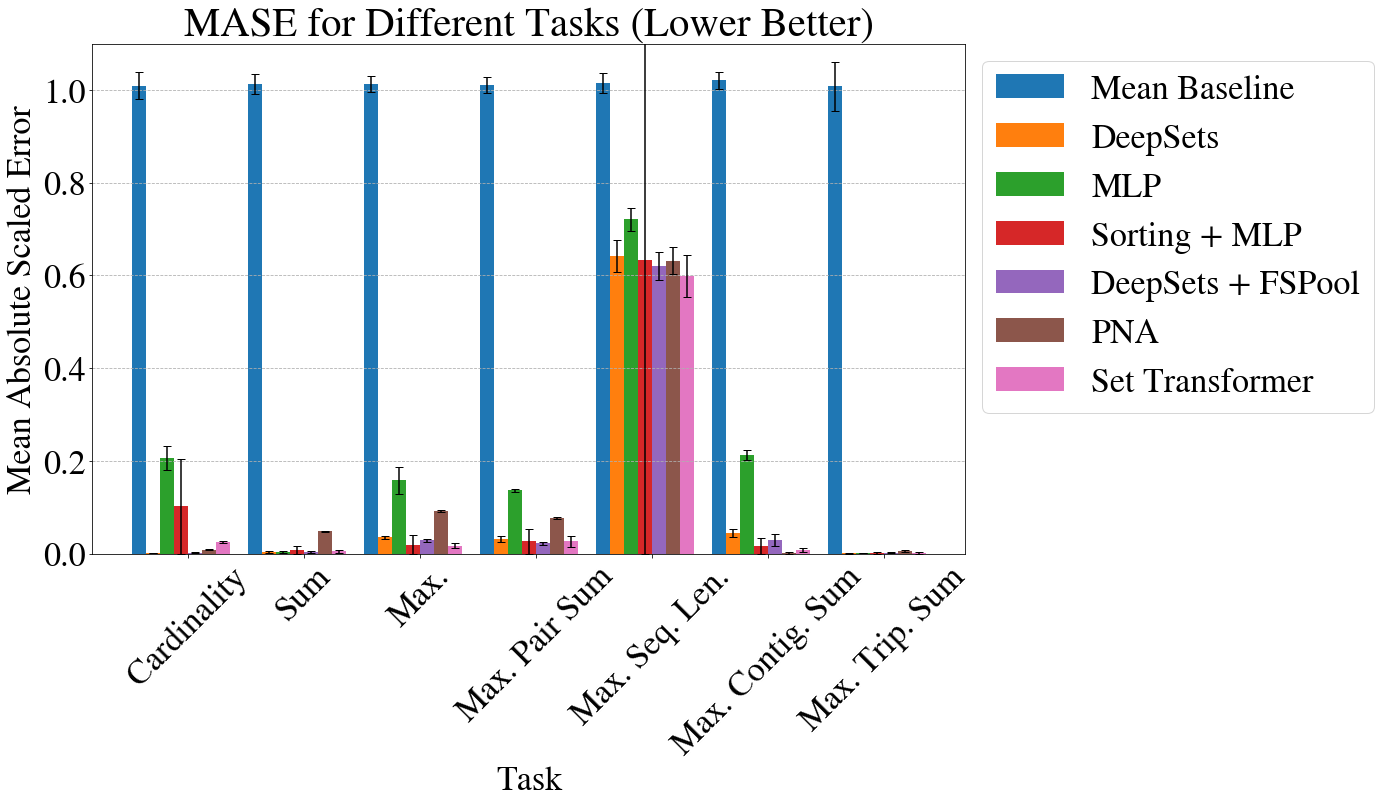

In [31]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 34

labels = [
    "Cardinality",
    "Sum",
    "Max.",
    "Max. Pair Sum",
    "Max. Seq. Len.",
    "Max. Contig. Sum",
    "Max. Trip. Sum",
]
# print(labels)
# labels = results["task"].unique()

baseline_means = results[results["model"] == "mean_baseline"]["mase"]
baselien_errs = results[results["model"] == "mean_baseline"]["mase_std"]

mlp_means = results[results["model"] == "mlp"]["mase"]
mlp_errs = results[results["model"] == "mlp"]["mase_std"]

sorted_mlp_means = results[results["model"] == "sorted_mlp"]["mase"]
sorted_mlp_errs = results[results["model"] == "sorted_mlp"]["mase_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["mase"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["mase_std"]

deepsets_fspool_means = results[results["model"] == "deepsets_mlp_fspool"]["mase"]
deepsets_fspool_errs = results[results["model"] == "deepsets_mlp_fspool"]["mase_std"]

pna_means = results[results["model"] == "pna"]["mase"]
pna_errs = results[results["model"] == "pna"]["mase_std"]

set_transformer_means = results[results["model"] == "small_set_transformer"]["mase"]
set_transformer_errs = results[results["model"] == "small_set_transformer"]["mase_std"]


x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(20,12))
fig.set_facecolor("white")

ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baselien_errs, capsize=4, width=width, label="Mean Baseline")
ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=sorted_mlp_means, yerr=sorted_mlp_means, capsize=4, width=width, label="Sorting + MLP")
ax.bar(x=(x + 1 * width/2), height=deepsets_fspool_means, yerr=deepsets_fspool_errs, capsize=4, width=width, label="DeepSets + FSPool")
ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

ax.set_xlabel("Task")
ax.set_xticks(x, labels)
ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("Mean Absolute Scaled Error")
ax.set_ylim([0, 1.1])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("MASE for Different Tasks (Lower Better)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.savefig("mase-redo-tasks-all-models.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()

# Follow-Up: Optimized vs. Non-Optimized DeepSets

In [11]:
###########
# Utility #
###########

def filter_by_values(data: pd.DataFrame, column: str, values: Sequence[Any]) -> pd.DataFrame:
    return data[data[column].isin(values)]

def average_over_seeds(data: pd.DataFrame) -> pd.DataFrame:
    averaged_data = data.groupby(["model", "task"], as_index=False).mean()
    averaged_data.drop("seed", axis="columns", inplace=True)
    return averaged_data

def get_result_paths(directory: str):
    return [os.path.join(directory, f) for f in os.listdir(directory)]

result_paths = get_result_paths(os.path.join("data", "opt-vs-non-opt"))
result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
results = pd.concat([
    df[[
        "type",
        "label",
        "max_set_size",
        "test_label_std",
        "test_mae",
        "test_mase",
        "test_r2",
        "random_seed"
    ]]
for df in result_dfs])

#################
# Preprocessing #
#################

# Restrict to maximum set size of 16.
# results = filter_by_values(
#     results,
#     "max_set_size",
#     values=[16]
# )

# Rename the columns to more user-friendly values.
results = results.rename(
    columns={
        "type": "model",
        "label": "task",
        "test_label_std": "label_std",
        "test_mae": "mae",
        "test_mase": "mase",
        "test_r2": "r2",
        "random_seed": "seed",
    }
)

# Filter out all the tasks we want to display.
# results = filter_by_values(
#     results,
#     "task", 
#     values=[
#         "sum",
#         "largest_pair_sum",
#         "largest_triple_sum",
#     ]
# )

# Filter out all the models we want to display.
# results = filter_by_values(
#     results,
#     "model",
#     values=[
#         # "mean_baseline",
#         "deepsets_mlp_sum",
#         "deepsets_mlp_fspool",
#         "sorted_mlp",
#         "mlp",
#         "pna",
#         "small_set_transformer"
#     ]
# )

# Accumulate results over the different seeds.
results_mean = results.groupby(["model", "task"], as_index=False).mean()
results_std = results.groupby(["model", "task"], as_index=False).std()

results = results_mean
results_mean["mae_std"] = results_std["mae"]
results_mean["r2_std"] = results_std["r2"]
results_mean["mase_std"] = results_std["mase"]
results.drop("seed", axis="columns", inplace=True)

# Filter out the columns we need.
results = results[["model", "task", "label_std", "mae", "mae_std", "r2", "r2_std", "mase", "mase_std"]]

# Rename models to display names.
# DISPLAY_MODEL_NAMES = {
#     "deepsets_mlp_sum": "DeepSets",
#     "deepsets_mlp_fspool": "DeepSets + FSPool",
#     "sorted_mlp": "Sorting + MLP",
#     "mlp": "MLP",
#     "pna": "PNA",
#     "small_set_transformer": "Set Transformer"    
# }

# for old, new in DISPLAY_MODEL_NAMES.items():
#     results = results.replace(
#         to_replace=old,
#         value=new
#     )

# Rename tasks to display names.
# DISPLAY_TASK_NAMES = {
#     "sum": "Sum",
#     "largest_pair_sum": "Max. Pair Sum",
#     "largest_triple_sum": "Max. Trip. Sum",
# }

# for old, new in DISPLAY_TASK_NAMES.items():
#     results = results.replace(
#         to_replace=old,
#         value=new
#     )

display(results)

,model,task,label_std,mae,mae_std,r2,r2_std,mase,mase_std
0,deepsets_ds1t,desperate_student_1_tuple,14.103166,0.068918,0.022950,0.999953,0.000036,0.006705,0.002234
1,deepsets_ds1t,desperate_student_2_tuple,10.778322,0.243596,0.035545,0.998502,0.000562,0.030958,0.004570
2,deepsets_ds1t,desperate_student_3_tuple,7.915071,0.269618,0.056444,0.996185,0.001398,0.046842,0.009674
3,deepsets_ds1t,desperate_student_4_tuple,6.210568,0.183667,0.020905,0.995224,0.003591,0.042381,0.004948
4,deepsets_ds1t,desperate_student_5_tuple,4.853772,0.156255,0.024420,0.993937,0.003448,0.046292,0.007056
5,deepsets_mlp_sum,desperate_student_1_tuple,14.103166,0.212074,0.075851,0.999542,0.000338,0.020628,0.007358
6,deepsets_mlp_sum,desperate_student_2_tuple,10.778322,0.331708,0.051157,0.997037,0.000749,0.042143,0.006483
7,deepsets_mlp_sum,desperate_student_3_tuple,7.915071,0.256655,0.046706,0.995990,0.001540,0.044616,0.008137
8,deepsets_mlp_sum,desperate_student_4_tuple,6.210568,0.228417,0.068654,0.989170,0.009769,0.052730,0.016006
9,deepsets_mlp_sum,desperate_student_5_tuple,4.853772,0.164153,0.047362,0.986196,0.019687,0.048604,0.013820


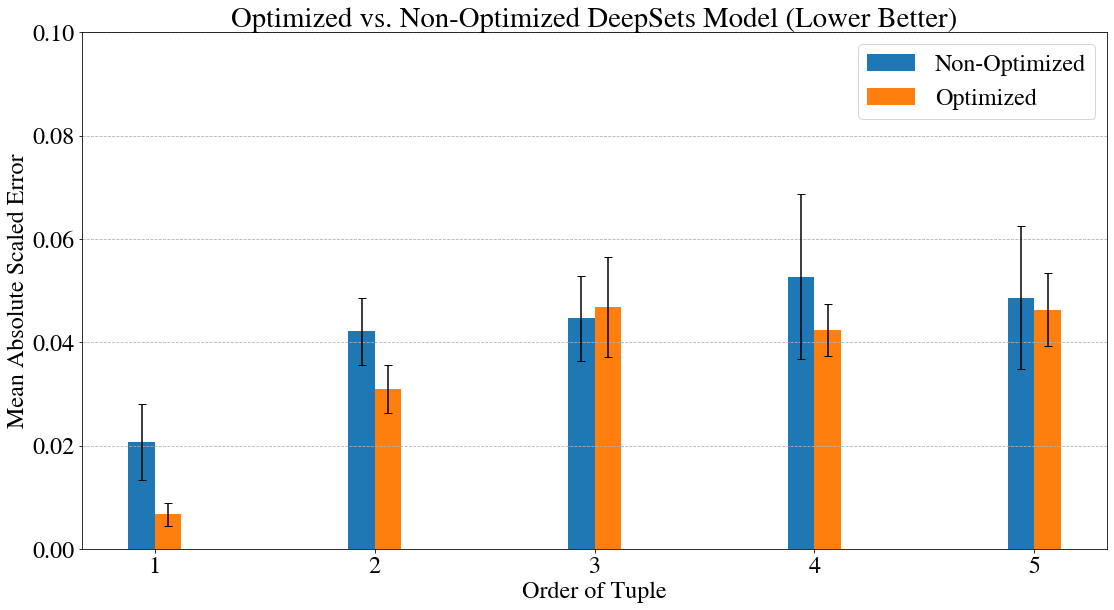

In [12]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 24

labels = [
    "1",
    "2",
    "3",
    "4",
    "5",
    # "6",
]
# print(labels)
# labels = results["task"].unique()

# baseline_means = results[results["model"] == "mean_baseline"]["mae"]
# baselien_errs = results[results["model"] == "mean_baseline"]["mae_std"]

deepsets_means = results[results["model"] == "deepsets_mlp_sum"]["mase"]
deepsets_errs = results[results["model"] == "deepsets_mlp_sum"]["mase_std"]

deepsets_opt_means = results[results["model"] == "deepsets_ds1t"]["mase"]
deepsets_opt_errs = results[results["model"] == "deepsets_ds1t"]["mase_std"]

x = np.arange(len(labels)) * 3  # the label locations
width = 0.36  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(16,9))
fig.set_facecolor("white")

# ax.bar(x=(x - 7 * width/2), height=baseline_means, yerr=baselien_errs, capsize=4, width=width, label="Mean Baseline")
# ax.bar(x=(x - 5 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="DeepSets")
# ax.bar(x=(x - 3 * width/2), height=mlp_means, yerr=mlp_errs, capsize=4, width=width, label="MLP")
ax.bar(x=(x - 1 * width/2), height=deepsets_means, yerr=deepsets_errs, capsize=4, width=width, label="Non-Optimized")
ax.bar(x=(x + 1 * width/2), height=deepsets_opt_means, yerr=deepsets_opt_errs, capsize=4, width=width, label="Optimized")
# ax.bar(x=(x + 3 * width/2), height=pna_means, yerr=pna_errs, capsize=4, width=width, label="PNA")
# ax.bar(x=(x + 5 * width/2), height=set_transformer_means, yerr=set_transformer_errs, capsize=4, width=width, label="Set Transformer")

ax.set_xlabel("Order of Tuple")
ax.set_xticks(x, labels)
# ax.tick_params(axis='x', labelrotation=45)

ax.set_ylabel("Mean Absolute Scaled Error")
ax.set_ylim([0, 0.1])
ax.grid(axis="y", linestyle="dashed")

ax.set_title("Optimized vs. Non-Optimized DeepSets Model (Lower Better)")
ax.legend()

plt.savefig("mase-opt-vs-non-opt.pdf", bbox_inches="tight")

fig.tight_layout()
plt.show()